In [1]:
#DIR3122: Computational Fluid Dynamics - Bridget McGibbon
#Step 7: Diffusion in 2D

In [28]:
#define variables
sigma = 0.2
nu = 0.05 #viscosity

nx = 81
dx = 2/(nx-1)

ny = nx
dy = 2/(ny-1)

nt = 60
dt = (sigma*(dx**2))/nu

#create arrays for space dimensions()
xdim = np.linspace(0,2,nx)
ydim = np.linspace(0,2,ny)

#create arrays for u (x-component of dependant variable) and v (y-component of dependant variable)
u = np.ones((nx,ny))
v = np.ones((nx,ny))

#set I.C.: 
#u=2 when 0.5<=x<=1 AND 0.5<=y<=1, u=1 everywhere else
#v=2 when 0.5<=x<=1 AND 0.5<=y<=1, v=1 everywhere else
u[int(0.5/dx):int(1/dx)+1, int(0.5/dy):int(1/dy)+1] = 2
v[int(0.5/dx):int(1/dx)+1, int(0.5/dy):int(1/dy)+2] = 2

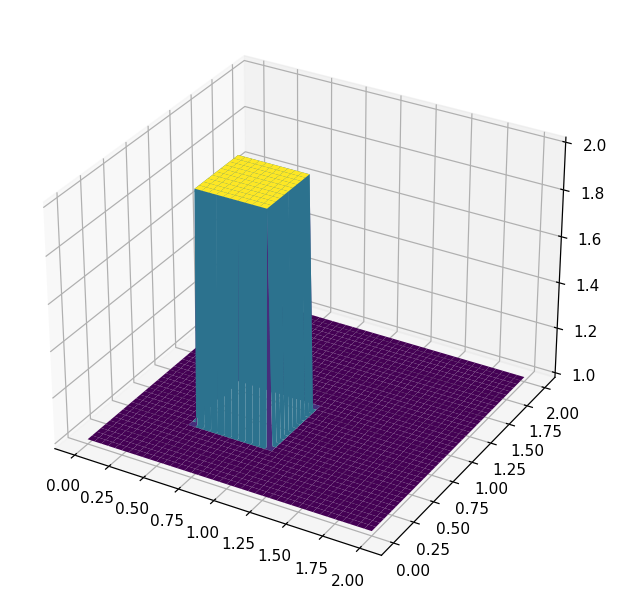

In [29]:
fig = pyplot.figure(figsize = (11,7), dpi=110) #create a figure, figsize and dpi denote the size and resolution, respectively
ax = fig.gca(projection='3d')
X, Y = np.meshgrid(xdim, ydim)
surf = ax.plot_surface(X, Y, u[:], cmap=cm.viridis)

In [30]:
for n in range(1, nt):
    un = u.copy()
    vn = v.copy()

#     u_i1j0 = np.array((np.append(un[0,1:],un[0,:1]), un[1]))
#     u_i0j1 = np.array((un[0], np.append(un[1,1:], un[1,:1])))
#     v_i1j0 = np.array((np.append(vn[0,1:],vn[0,:1]),(vn[1])))
#     v_i0j1 = np.array((vn[0], np.aupend(vn[1,1:], vn[1,:1])))
    
    #i=0 and j=0 is the slice from 1 to -1
    u[1:-1,1:-1] = un[1:-1,1:-1] + nu*dt*(((un[0:-2,1:-1]+un[2:,1:-1]-2*un[1:-1,1:-1])/(dx**2)) + ((un[1:-1,0:-2]+u[1:-1,2:]-2*un[1:-1,1:-1])/(dy**2)))
    
    v[1:-1,1:-1] = vn[1:-1,1:-1] + nu*dt*(((vn[0:-2,1:-1]+vn[2:,1:-1]-2*vn[1:-1,1:-1])/(dx**2)) + ((vn[1:-1,0:-2]+v[1:-1,2:]-2*vn[1:-1,1:-1])/(dy**2)))
    
#     print("this is loop", n)
#     print("u[.8,.8] is", u[int(.8/dx),int(.8/dy)])
#     print("v[.8,.8] is", v[int(.8/dx),int(.8/dy)])
    #boundary conditions: u,v = 1 at boundaries
    u[0,:] = 1
    u[-1,:] = 1
    u[:,0] = 1
    u[:,-1] = 1
    
    v[0,:] = 1
    v[-1, :] = 1
    v[:,0] = 1
    v[:,-1] = 1
    

(1.0, 2.0)

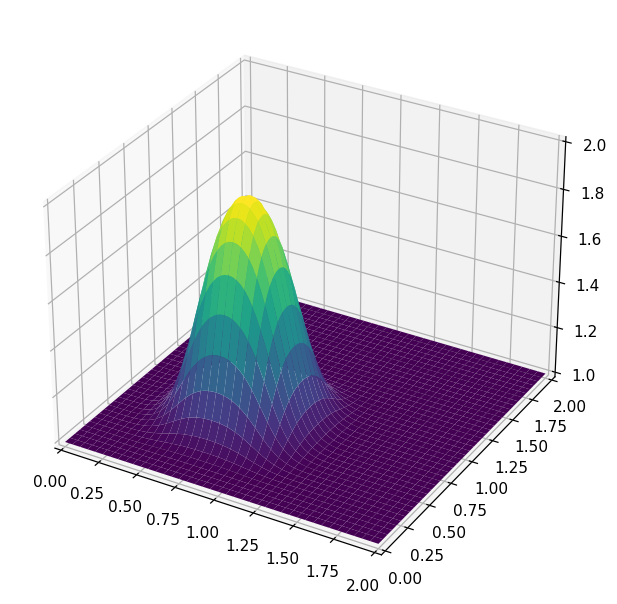

In [32]:
fig = pyplot.figure(figsize = (11,7), dpi=110) #create a figure, figsize and dpi denote the size and resolution, respectively
ax = fig.gca(projection='3d')
X, Y = np.meshgrid(xdim, ydim)
surf = ax.plot_surface(X, Y, u[:], cmap=cm.viridis)

ax.set_xlim(0, 2)
ax.set_ylim(0, 2)
ax.set_zlim(1, 2)